In [1]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

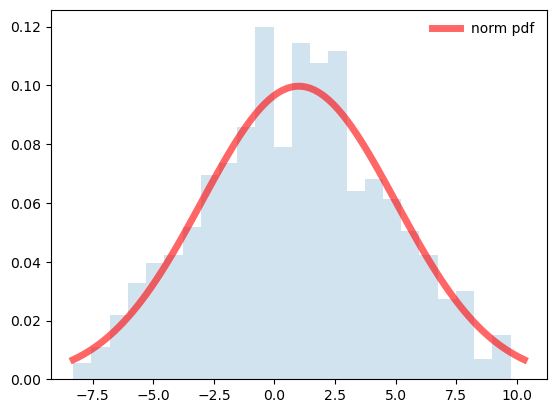

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.887772667692446
Sample variance: 15.400916527163549


In [2]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

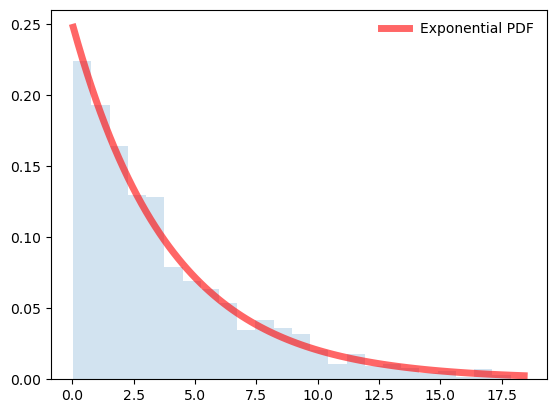

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.021674149315668
Sample variance: 16.565041879704534


In [3]:
#Exponential
#here goes your code
rv_expon = expon(scale=4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='Exponential PDF')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: expon

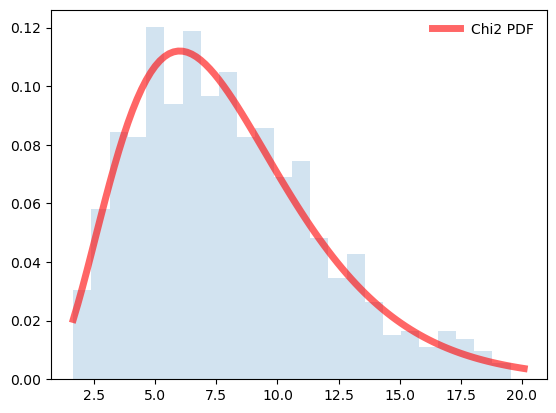

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.095196081464946
Sample variance: 16.90307176249041


In [4]:
#chi2
#here goes your code
rv_chi2 = chi2(8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='Chi2 PDF')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: chi2

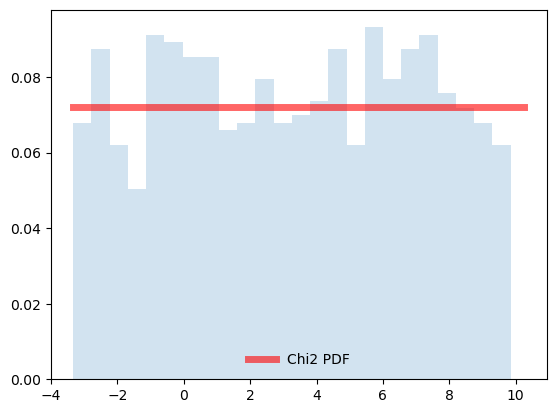

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.4877644919309443
Sample variance: 15.97059707485966


In [5]:
from numpy import sqrt

#uniform
#here goes your code
rv_uni = uniform(-2*sqrt(3),scale = 6*sqrt(3)+2*sqrt(3))
x = np.linspace(rv_uni.ppf(0.01), rv_uni.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uni.pdf(x), 'r-', lw=5, alpha=0.6, label='Chi2 PDF')
r = rv_uni.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_uni.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uni.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: uniform

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

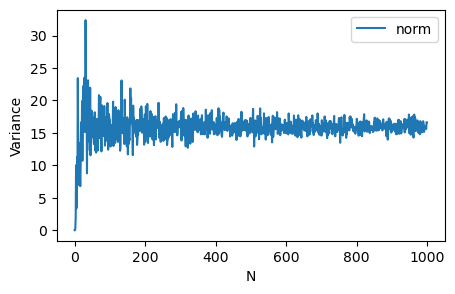

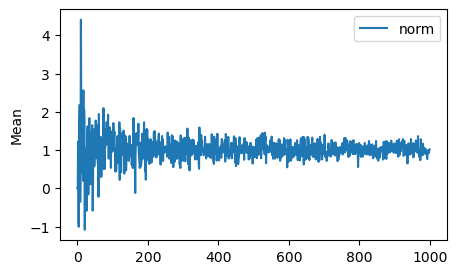

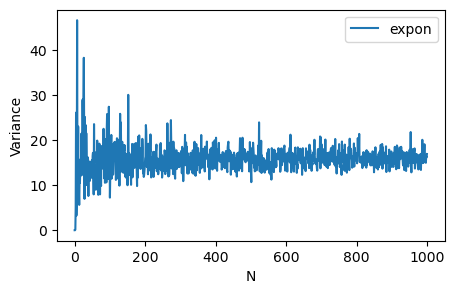

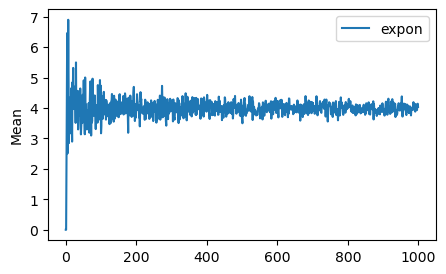

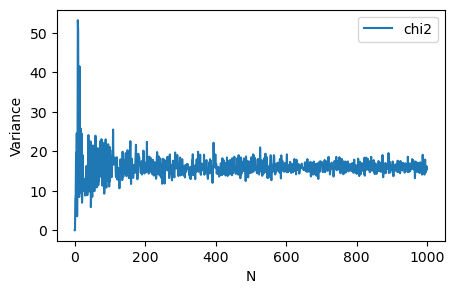

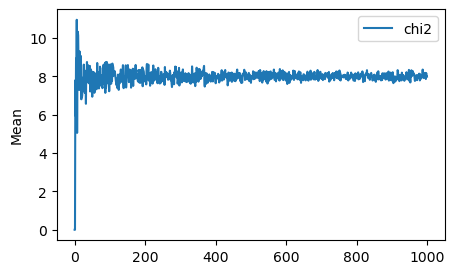

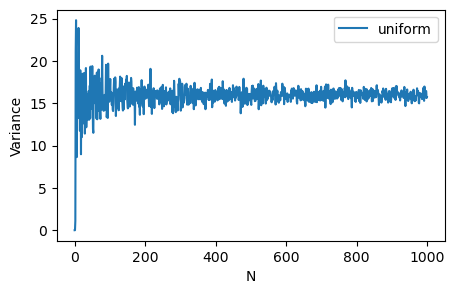

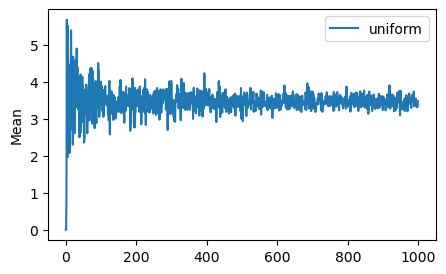

In [6]:
#here goes your code
import numpy as np

variances = np.zeros((4,1000))
means = np.zeros((4,1000))
distributions = [rv_norm, rv_expon, rv_chi2, rv_uni]
for i, dist in enumerate(distributions):
    for N in range(2, 1000):
        r = dist.rvs(size=N)
        variances[i, N] = np.var(r)
        means[i, N] = np.mean(r)
    plt.figure(figsize=(5,3))
    plt.plot(variances[i], label = str(dist.dist.name))
    plt.xlabel("N")
    plt.ylabel("Variance")
    plt.legend()
    plt.show()
    plt.figure(figsize=(5,3))
    plt.plot(means[i], label = str(dist.dist.name))
    plt.ylabel("Mean")
    plt.legend()
    plt.show()

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

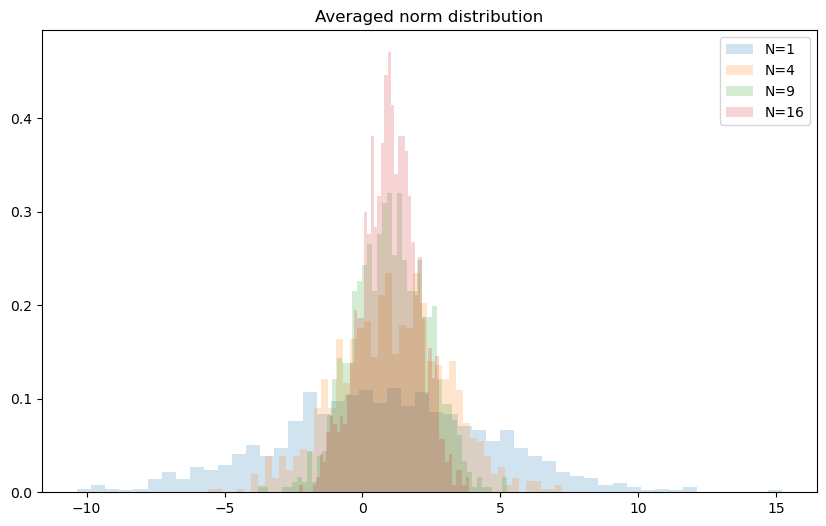

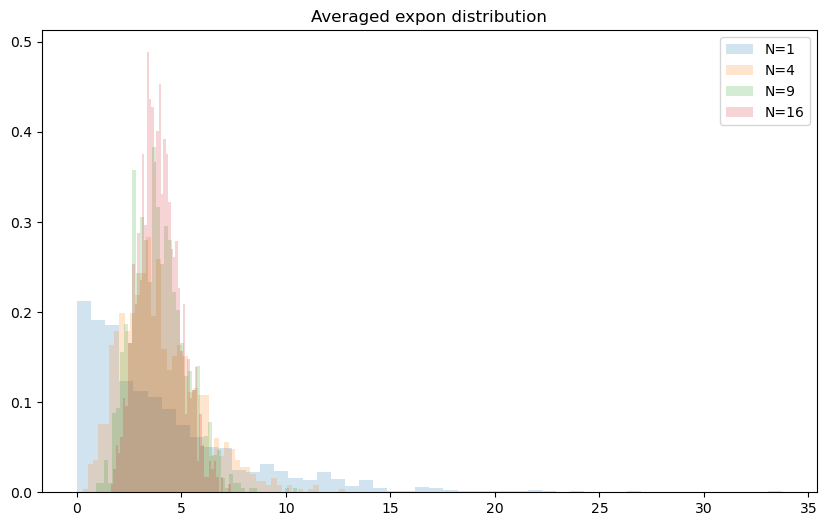

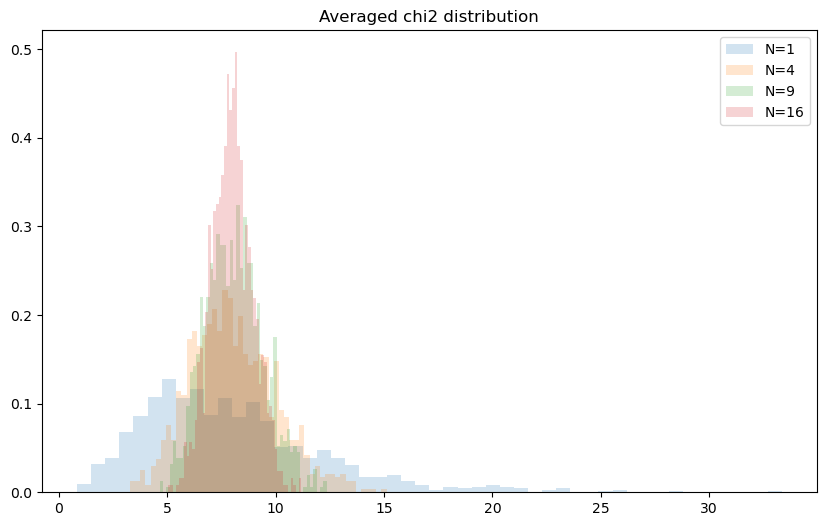

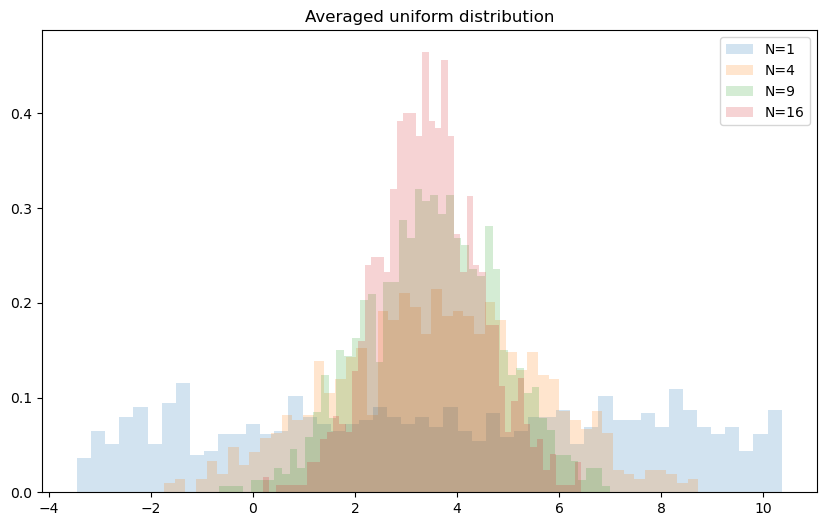

In [7]:
#here goes your code
for i in range (4):
    plt.figure(figsize=(10,6))
    for N in [1,4,9,16]:
        r = distributions[i].rvs(size=(N,1000))
        r = np.mean(r, axis=0)
        plt.hist(r, bins=50, density=True, histtype='stepfilled', alpha=0.2, label=f'N={N}')
    plt.title("Averaged "+distributions[i].dist.name+" distribution")
    plt.legend()
    plt.show()

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

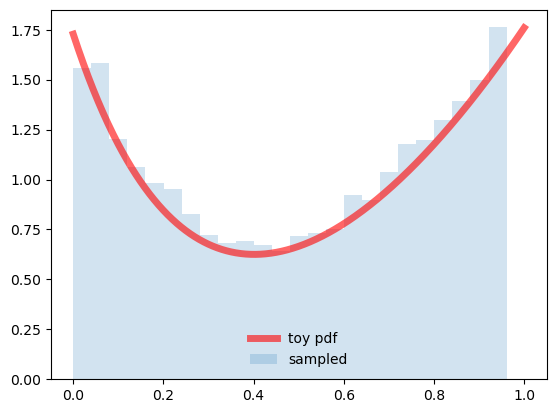

In [8]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code
    samples = []
    m = np.max(dist)
    n_points = len(x)
    while len(samples) < size:
        idx = np.random.randint(0, n_points)
        u = np.random.uniform(0, m)
        if dist[idx] > u:
            samples.append(x[idx])
    return np.array(samples)


samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

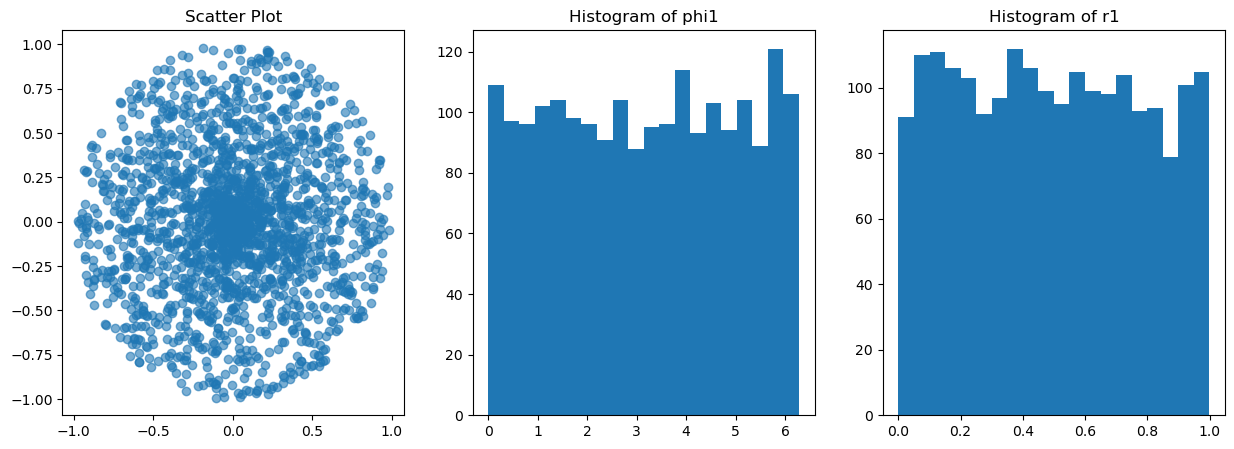

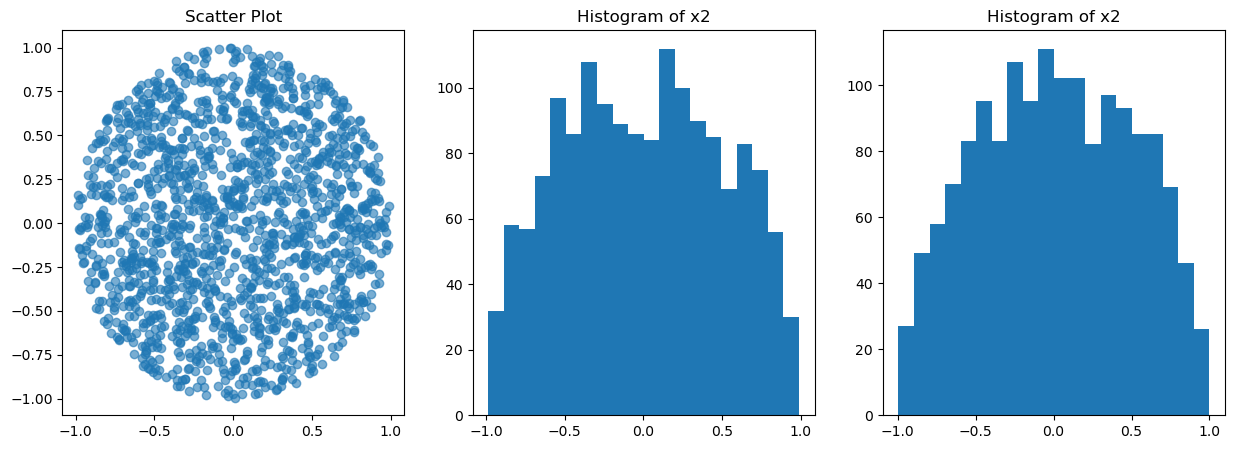

In [9]:
#Version1
#here goes your code
num_points = 2000
r1 = np.random.uniform(0,1,num_points)
phi1 = np.random.uniform(0,2*np.pi,num_points)
x1 = r1*np.cos(phi1)
y1 = r1*np.sin(phi1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot (Method 1)
axes[0].scatter(x1, y1, alpha=0.6)
axes[0].set_title('Scatter Plot')

axes[1].hist(phi1, bins=20)
axes[1].set_title('Histogram of phi1')

axes[2].hist(r1, bins=20)
axes[2].set_title('Histogram of r1')

plt.show()
#Version2
#here goes your code
x2 = np.random.uniform(-1,1,num_points)
y2 = np.random.uniform(-1,1,num_points)
mask = x2**2 + y2**2 <= 1
x2,y2 = x2[mask], y2[mask]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot (Method 1)
axes[0].scatter(x2, y2, alpha=0.6)
axes[0].set_title('Scatter Plot')

axes[1].hist(x2, bins=20)
axes[1].set_title('Histogram of x2')

axes[2].hist(y2, bins=20)
axes[2].set_title('Histogram of x2')

plt.show()
plt.show()

The difference between 1st and 2nd method is that in 1st method points are not distributed uniformly in the disk, but they are more dense in the center. In the 2nd method, points are distributed uniformly in the disk. That's because we are sampling radius uniformly in the 1st method, but it doesn't lead to uniform distribution in the disk, as the area of the disk increases with radius. In the 2nd method, we are sampling x and y coordinates uniformly, so we get uniform distribution in the disk. Area of the disk of radius r is $\pi r^2$, so area is proportional to the square of the radius. We need to sample radius with distribution proportional to $\sqrt{r}$ to get uniform distribution in the disk.



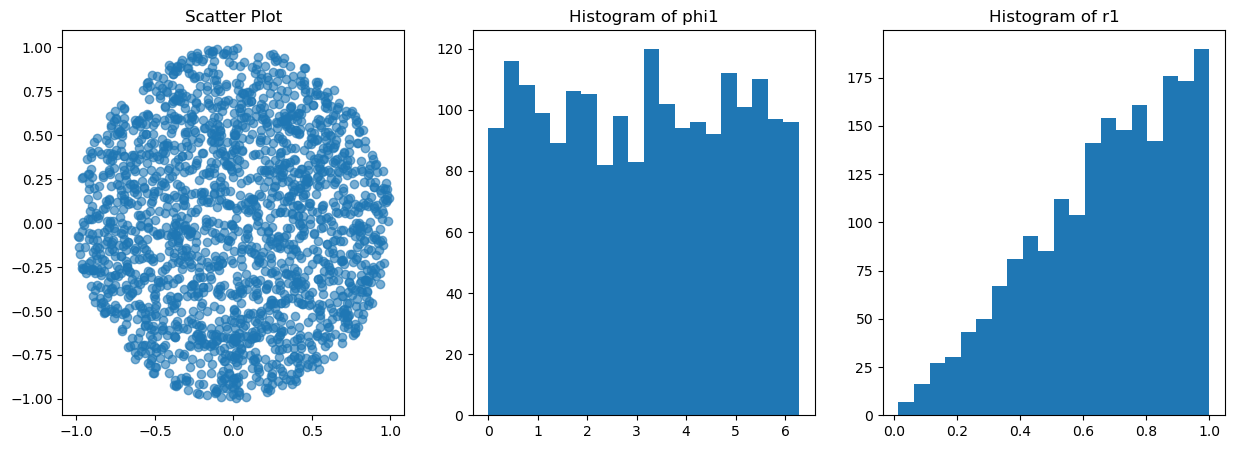

In [10]:
#Version3
#here goes your code
r3 = np.sqrt(np.random.uniform(0,1,num_points))
phi2 = np.random.uniform(0,2*np.pi,num_points)
x3 = r3*np.cos(phi2)
y3 = r3*np.sin(phi2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot (Method 1)
axes[0].scatter(x3, y3, alpha=0.6)
axes[0].set_title('Scatter Plot')

axes[1].hist(phi2, bins=20)
axes[1].set_title('Histogram of phi1')

axes[2].hist(r3, bins=20)
axes[2].set_title('Histogram of r1')

plt.show()

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [44]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

In [45]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [46]:
#here goes your code
def random_walk():
    start = np.array([np.random.randint(1,S-1), np.random.randint(1,S-1)])
    x, y = start
    path = []
    while 0 < x < S-1 and 0 < y < S-1:
        path.append((x,y))
        direction = np.random.choice([0,1,2,3])
        if direction == 0:
            x += 1
        elif direction == 1:
            x -= 1
        elif direction == 2:
            y += 1
        else:
            y -= 1
    vb = plane[x,y]
    for px, py in path:
        n = plane_counts[px, py]
        plane[px, py] = (n*plane[px, py] + vb)/(n+1)
        plane_counts[px, py] += 1

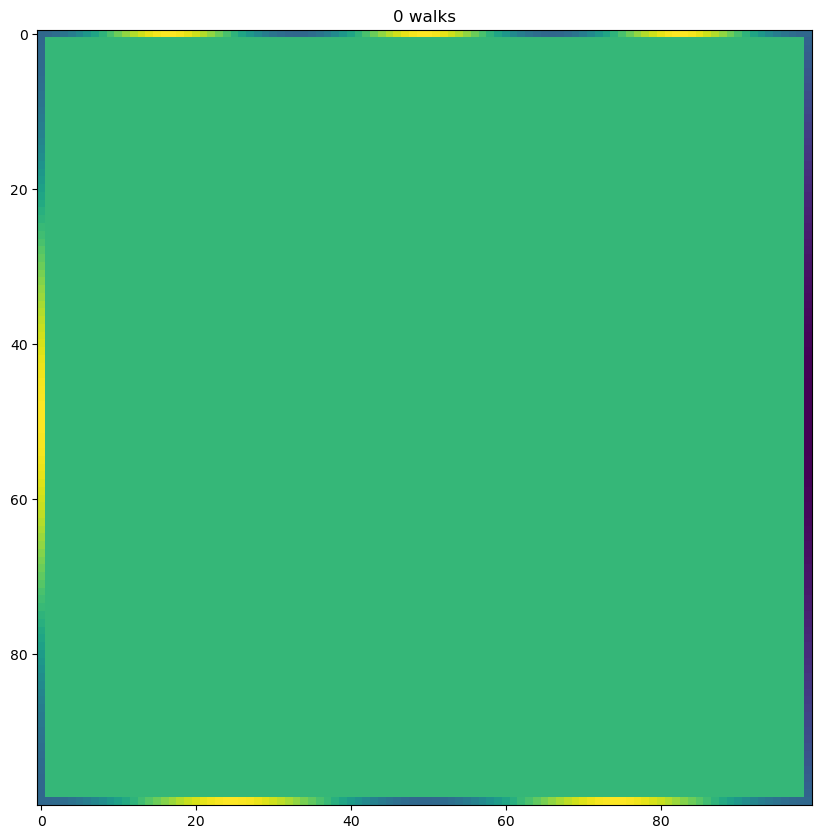

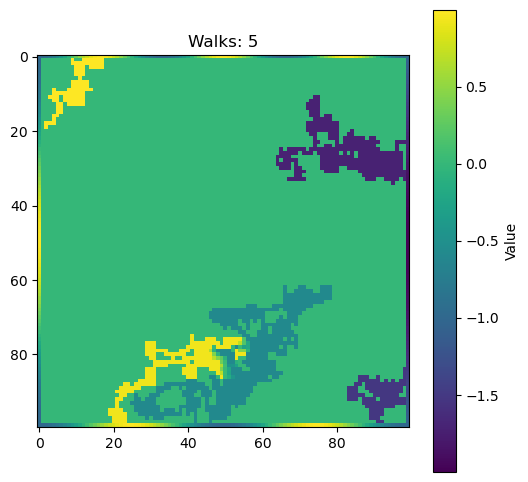

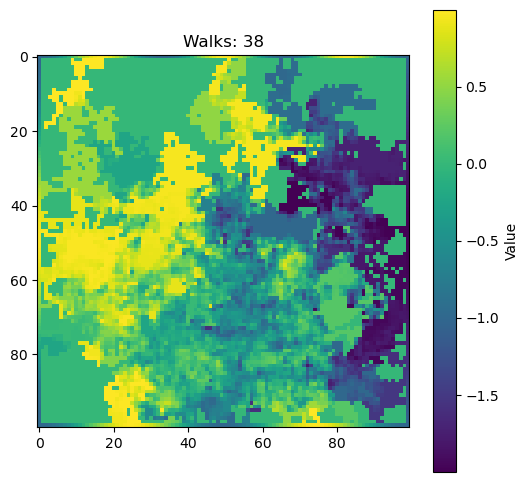

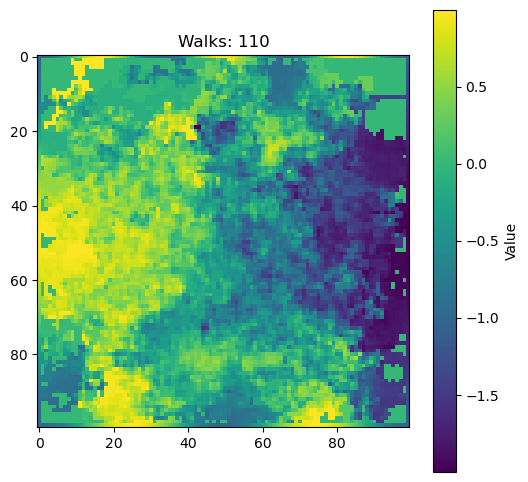

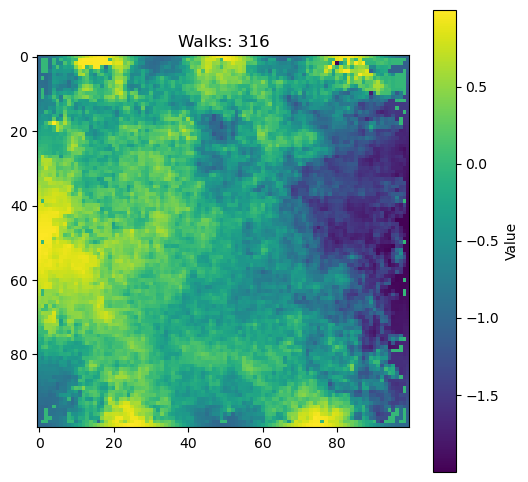

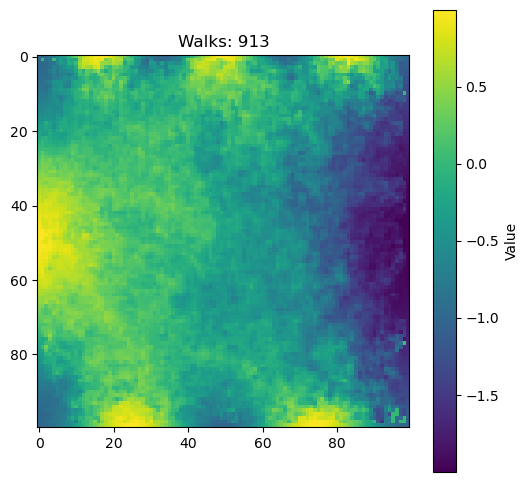

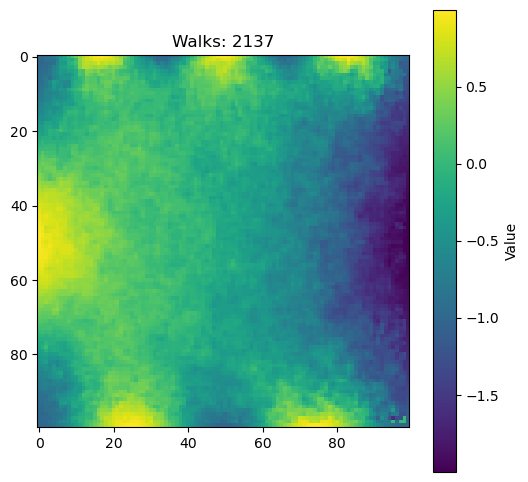

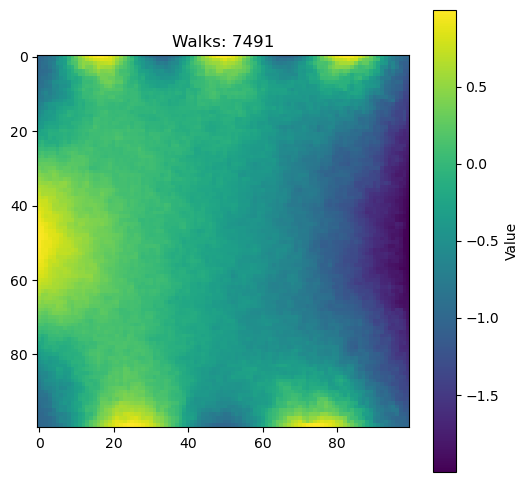

In [47]:
%matplotlib inline
walks = 0
while walks < 10000:  # Maksymalna liczba spacerów
    random_walk()
    walks += 1
    if walks in [5,38,110,316,913,2137,7491]:  # Rysuj wykres co 100 spacerów
        plt.figure(figsize=(6, 6))
        plt.title(f"Walks: {walks}")
        plt.imshow(plane, cmap='viridis')
        plt.colorbar(label='Value')
        plt.show()

In [27]:
#Animation code for testing purposes. May not work on your machine.
%matplotlib qt



fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(plane[0])
im.set_array(plane[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(plane[j])
    #plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()

TypeError: Invalid shape (100,) for image data